# Data Preparation & Visualisation

## Question 1: Discuss the concepts, techniques and processes underlying data visualisation to critically evaluate visualisation approaches with respect to their suitability for different problem areas. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### After importing all the required liabraries I have download the dataset from CSO official website. which is unemployment datase. Lets load it into here so we can perform operations on it. To load our dataset I am using pandas built in method named read_csv, which will load the datset to work it on.


In [5]:
monthlyUnemploymentDF=pd.read_csv('MUM01.20231006T231032.csv')

#### Before visualize our data. We need to understrannd it first. for that let's perform some EDA on it. First of all let's look into out data. we can use head method to  to look into the data that how it looks.


In [4]:
monthlyUnemploymentDF.head()

,Statistic Label,Month,Age Group,Sex,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands
0,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Both sexes,%,13.3,Thousand,55.4
1,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Male,%,13.7,Thousand,31.5
2,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Female,%,12.7,Thousand,23.9
3,Seasonally Adjusted Monthly Unemployment Rate,1998 January,25 - 74 years,Both sexes,%,7.4,Thousand,96.2
4,Seasonally Adjusted Monthly Unemployment Rate,1998 January,25 - 74 years,Male,%,6.9,Thousand,55.4


#### We can also use tail method to check last few rows of our data.

In [5]:
monthlyUnemploymentDF.tail()

,Statistic Label,Month,Age Group,Sex,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands
1849,Seasonally Adjusted Monthly Unemployment Rate,2023 September,15 - 24 years,Male,%,12.5,Thousand,22.5
1850,Seasonally Adjusted Monthly Unemployment Rate,2023 September,15 - 24 years,Female,%,11.3,Thousand,19.0
1851,Seasonally Adjusted Monthly Unemployment Rate,2023 September,25 - 74 years,Both sexes,%,3.1,Thousand,74.2
1852,Seasonally Adjusted Monthly Unemployment Rate,2023 September,25 - 74 years,Male,%,3.2,Thousand,40.7
1853,Seasonally Adjusted Monthly Unemployment Rate,2023 September,25 - 74 years,Female,%,2.9,Thousand,33.5


#### To check how many roas and column do we have in our dataset, we can use shape mehtod. this way we will get the idea that how large our dataset is. we will get total nunber of rows and columns in return.



In [6]:
monthlyUnemploymentDF.shape

(1854, 8)

#### Now lets check for the colunm names of my dataset. We can use columns keyword for that. it will retuen all the colunm names to us.

In [7]:
monthlyUnemploymentDF.columns

Index(['Statistic Label', 'Month', 'Age Group', 'Sex', 'UNIT',
       'VALUE In Percentage', 'UNIT.1', 'VALUE In Thousands'],
      dtype='object')

#### Now Let's look for any Null values in our dataset. we use isNull method to look for null values in our datase. We will use sum method with it. Sum will count all the missing values and show it to us.This is important for the analysis beause if we have null values so we need to fix it using the mean or median.

In [8]:
monthlyUnemploymentDF.isnull().sum()

Statistic Label        0
Month                  0
Age Group              0
Sex                    0
UNIT                   0
VALUE In Percentage    0
UNIT.1                 0
VALUE In Thousands     0
dtype: int64

#### Now lets look for any duplicate values in our datase. It is very common to get duplicate data in our dataset.It is important step to look for any duplicate rows in dataset and remove them if we find any.

In [7]:
dupliatevaluesForDA = monthlyUnemploymentDF.duplicated().sum()
print("Duplicate rows in our Dataset are: ", dupliatevaluesForDA)

Duplicate rows in our Dataset are:  0


#### Anoother import step is to check the data type of each column. and if there is a mismath in the data aand it's type. we can fix it. Below I used the info method to test the data types of each column.

In [10]:
monthlyUnemploymentDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      1854 non-null   object 
 1   Month                1854 non-null   object 
 2   Age Group            1854 non-null   object 
 3   Sex                  1854 non-null   object 
 4   UNIT                 1854 non-null   object 
 5   VALUE In Percentage  1854 non-null   float64
 6   UNIT.1               1854 non-null   object 
 7   VALUE In Thousands   1854 non-null   float64
dtypes: float64(2), object(6)
memory usage: 116.0+ KB


#### As we noticed above that our Month column is of object type. let's  convert it into DateTime using pandas to_datetime function. it will be helpful in our analysis further.

In [6]:
monthlyUnemploymentDF['Month'] = pd.to_datetime(monthlyUnemploymentDF['Month'])
# In the following line we are formating the datetime values to Year - Month Format
#monthlyUnemploymentDF['Month'] = monthlyUnemploymentDF['Month'].dt.strftime('%Y - %m')

print("New Date: ", monthlyUnemploymentDF['Month'])

New Date:  0      1998-01-01
1      1998-01-01
2      1998-01-01
3      1998-01-01
4      1998-01-01
          ...    
1849   2023-09-01
1850   2023-09-01
1851   2023-09-01
1852   2023-09-01
1853   2023-09-01
Name: Month, Length: 1854, dtype: datetime64[ns]


#### Now lets get some statistics about our data using describe method. It will give us standard deviation,count, mean etc

In [12]:
monthlyUnemploymentDF.describe()

,VALUE In Percentage,VALUE In Thousands
count,1854.000000,1854.000000
mean,10.680529,56.665696
std,7.539243,48.541094
min,2.900000,11.000000
25%,4.700000,25.200000
50%,8.800000,39.000000
75%,13.200000,69.675000
max,39.300000,268.400000


#### Lets calculate Mean, Median, Variance, Standarad Deviation, minimum, and maximum. 

#### To calculate mean we need to group our data. We can group by Age, Year, Month and Sex using group by function. We can use mean built in function to find mean.


In [13]:
groupedMeanBySexAndAgeAndYearDV=monthlyUnemploymentDF.groupby(['Month', 'Age Group', 'Sex'])

# Here we are calculating mean for each group we created above and conerting our resilt into seprate dataframe
# And after that just printing the values
meanInPercentageDV=groupedMeanBySexAndAgeAndYearDV['VALUE In Percentage'].mean()
meanInThousandsDV=groupedMeanBySexAndAgeAndYearDV['VALUE In Thousands'].mean()

meanPercentageDFDV=meanInPercentageDV.reset_index()
meanThousandsDFDV=meanInThousandsDV.reset_index()

print("Mean In Percentage")
print(meanPercentageDFDV)
print("Mean In Thousands")
print(meanThousandsDFDV)

Mean In Percentage
          Month      Age Group         Sex  VALUE In Percentage
0    1998-01-01  15 - 24 years  Both sexes                 13.3
1    1998-01-01  15 - 24 years      Female                 12.7
2    1998-01-01  15 - 24 years        Male                 13.7
3    1998-01-01  25 - 74 years  Both sexes                  7.4
4    1998-01-01  25 - 74 years      Female                  8.1
...         ...            ...         ...                  ...
1849 2023-09-01  15 - 24 years      Female                 11.3
1850 2023-09-01  15 - 24 years        Male                 12.5
1851 2023-09-01  25 - 74 years  Both sexes                  3.1
1852 2023-09-01  25 - 74 years      Female                  2.9
1853 2023-09-01  25 - 74 years        Male                  3.2

[1854 rows x 4 columns]
Mean In Thousands
          Month      Age Group         Sex  VALUE In Thousands
0    1998-01-01  15 - 24 years  Both sexes                55.4
1    1998-01-01  15 - 24 years      Female  

#### Now lets calculate the mean for subgroups. Lets filter our data and select a sepcific age group, gender and calculate mean for subgroups now.This way we can analyze the subset of the data. By grouping our data we can have detailed analysis rather than looking at whole data.

In [12]:
# lets take mean by age agroup of 14 - 24 of just males

meanForMaleForOneAge=monthlyUnemploymentDF[(monthlyUnemploymentDF['Age Group'] == '15 - 24 years') & (monthlyUnemploymentDF['Sex'] == 'Male')]

meanInPerentForMaleForOneAge=meanForMaleForOneAge['VALUE In Percentage'].mean()
meanInThousandForMaleForOneAge=meanForMaleForOneAge['VALUE In Thousands'].mean()                    

meanResultMaleForOneAgeGroupDF=pd.DataFrame({
    'Sex': ['Male'],
    'Age Group':['15 - 24 years'],
    'Mean In Percentage': [meanInPerentForMaleForOneAge],
    'Mean In Thousands': [meanInThousandForMaleForOneAge]
    
})
print(meanResultMaleForOneAgeGroupDF)

    Sex      Age Group  Mean In Percentage  Mean In Thousands
0  Male  15 - 24 years           17.190291          30.306472


In [27]:
# lets take mean by age agroup of 255 - 74 of just males

meanForMaleForSecondAge=monthlyUnemploymentDF[(monthlyUnemploymentDF['Age Group'] == '25 - 74 years') & (monthlyUnemploymentDF['Sex'] == 'Male')]

meanInPerentForMaleForSecondAge=meanForMaleForSecondAge['VALUE In Percentage'].mean()
meanInThousandForMaleForSecondAge=meanForMaleForSecondAge['VALUE In Thousands'].mean()                    

meanResultMaleForSecondAgeGroupDF=pd.DataFrame({
    'Sex': ['Male'],
    'Age Group':['25 - 74 years'],
    'Mean In Percentage': [meanInPerentForMaleForSecondAge],
    'Mean In Thousands': [meanInThousandForMaleForSecondAge]
    
})
print(meanResultMaleForSecondAgeGroupDF)

    Sex      Age Group  Mean In Percentage  Mean In Thousands
0  Male  25 - 74 years            6.706472          70.859871


#### Now lets calculate the subgroup mean for females. Lets filter our data and select a sepcific age group, gender and calculate mean. This way we can analyze the subset of the data. By grouping our data we can have detailed analysis rather than looking at whole data.

In [14]:
# lets take mean by age agroup of 15 - 24 years of just Females

meanForFeMaleForSecondAge=monthlyUnemploymentDF[(monthlyUnemploymentDF['Age Group'] == '15 - 24 years') & (monthlyUnemploymentDF['Sex'] == 'Female')]

meanInPerentForFeMaleForSecondAge=meanForFeMaleForSecondAge['VALUE In Percentage'].mean()
meanInThousandForFeMaleForSecondAge=meanForFeMaleForSecondAge['VALUE In Thousands'].mean()                    

meanResultFeMaleForOneAgeGroupDF=pd.DataFrame({
    'Sex': ['Female'],
    'Age Group':['15 - 24 years'],
    'Mean In Percentage': [meanInPerentForFeMaleForSecondAge],
    'Mean In Thousands': [meanInThousandForFeMaleForSecondAge]
    
})
print(meanResultFeMaleForOneAgeGroupDF)

      Sex      Age Group  Mean In Percentage  Mean In Thousands
0  Female  15 - 24 years           12.802913          19.976699


In [15]:
# lets take mean by age agroup of 25 - 74 of just Females

meanForFeMaleForOneAge=monthlyUnemploymentDF[(monthlyUnemploymentDF['Age Group'] == '25 - 74 years') & (monthlyUnemploymentDF['Sex'] == 'Female')]

meanInPerentForFeMaleForOneAge=meanForFeMaleForOneAge['VALUE In Percentage'].mean()
meanInThousandForMaleForOneAge=meanForFeMaleForOneAge['VALUE In Thousands'].mean()                    

meanResultFeMaleForSecondAgeGroupDF=pd.DataFrame({
    'Sex': ['Female'],
    'Age Group':['25 - 74 years'],
    'Mean In Percentage': [meanInPerentForFeMaleForOneAge],
    'Mean In Thousands': [meanInThousandForMaleForOneAge]
    
})
print(meanResultFeMaleForSecondAgeGroupDF)

      Sex      Age Group  Mean In Percentage  Mean In Thousands
0  Female  25 - 74 years             5.91521          48.852751


#### Now Lets find median of each year. we can simply calculate median by median() method. Here i am grouping the data and  calculating for Both Sexes(Male and female) and for one age group (15 - 24). This way we can understand the typical value within subgroups and have better understranding of our data.

In [16]:
medianForOneAgeGroup=monthlyUnemploymentDF[(monthlyUnemploymentDF['Sex']=='Both sexes')
& (monthlyUnemploymentDF['Age Group']=='15 - 24 years')]

medianForOneAgeGroup['Year']=medianForOneAgeGroup['Month'].str.extract('(\d{4})')



medianGroupedByYear= medianForOneAgeGroup.groupby(['Year','Age Group','Sex'])
medianInPercentageByYear=medianGroupedByYear['VALUE In Percentage'].median()
medianInThousandsByYear=medianGroupedByYear['VALUE In Thousands'].median()


medianInPercentageByYearDF=medianInPercentageByYear.reset_index()
medianInThousandsByYearDF=medianInThousandsByYear.reset_index()


print("Median In Percentage For Both Sexes for Age Group Of 15 - 24")
print(medianInPercentageByYearDF)
print("Median In Thousands For Both Sexes for Age Group Of 15 - 24")
print(medianInThousandsByYearDF)


Median In Percentage For Both Sexes for Age Group Of 15 - 24
    Year      Age Group         Sex  VALUE In Percentage
0   1998  15 - 24 years  Both sexes                10.70
1   1999  15 - 24 years  Both sexes                 8.35
2   2000  15 - 24 years  Both sexes                 6.65
3   2001  15 - 24 years  Both sexes                 7.40
4   2002  15 - 24 years  Both sexes                 8.45
5   2003  15 - 24 years  Both sexes                 8.75
6   2004  15 - 24 years  Both sexes                 8.80
7   2005  15 - 24 years  Both sexes                 8.65
8   2006  15 - 24 years  Both sexes                 9.00
9   2007  15 - 24 years  Both sexes                 9.15
10  2008  15 - 24 years  Both sexes                13.15
11  2009  15 - 24 years  Both sexes                25.15
12  2010  15 - 24 years  Both sexes                27.30
13  2011  15 - 24 years  Both sexes                29.55
14  2012  15 - 24 years  Both sexes                31.20
15  2013  15 - 24 years  Bo

C:\Users\UmarIqbal\AppData\Local\Temp\ipykernel_7720\1603603406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medianForOneAgeGroup['Year']=medianForOneAgeGroup['Month'].str.extract('(\d{4})')


#### Now let's calculate the median again same way for other age group (25 - 74)

In [17]:
# Iam calculating for Both Sexes(Male and female) and for Second age group age group (25 - 74)

medianForSecondAgeGroup=monthlyUnemploymentDF[(monthlyUnemploymentDF['Sex']=='Both sexes')
& (monthlyUnemploymentDF['Age Group']=='25 - 74 years')]

medianForSecondAgeGroup['Year']=medianForSecondAgeGroup['Month'].str.extract('(\d{4})')



medianSecondGroupedByYear= medianForSecondAgeGroup.groupby(['Year','Age Group','Sex'])
medianInPercentageSecondByYear=medianSecondGroupedByYear['VALUE In Percentage'].median()
medianInThousandsSecondByYear=medianSecondGroupedByYear['VALUE In Thousands'].median()


medianInPercentageSecondByYearDF=medianInPercentageSecondByYear.reset_index()
medianInThousandsSecondByYearDF=medianInThousandsSecondByYear.reset_index()


print("Median In Percentage For Both Sexes for Age Group Of 25 - 74 years")
print(medianInPercentageSecondByYearDF)
print("Median In Thousands For Both Sexes for Age Group Of 25 - 74 years")
print(medianInThousandsSecondByYearDF)


Median In Percentage For Both Sexes for Age Group Of 25 - 74 years
    Year      Age Group         Sex  VALUE In Percentage
0   1998  25 - 74 years  Both sexes                 6.55
1   1999  25 - 74 years  Both sexes                 4.85
2   2000  25 - 74 years  Both sexes                 3.80
3   2001  25 - 74 years  Both sexes                 3.35
4   2002  25 - 74 years  Both sexes                 3.60
5   2003  25 - 74 years  Both sexes                 3.80
6   2004  25 - 74 years  Both sexes                 3.70
7   2005  25 - 74 years  Both sexes                 3.60
8   2006  25 - 74 years  Both sexes                 3.80
9   2007  25 - 74 years  Both sexes                 3.90
10  2008  25 - 74 years  Both sexes                 5.15
11  2009  25 - 74 years  Both sexes                10.50
12  2010  25 - 74 years  Both sexes                12.25
13  2011  25 - 74 years  Both sexes                13.25
14  2012  25 - 74 years  Both sexes                13.20
15  2013  25 - 74 yea

C:\Users\UmarIqbal\AppData\Local\Temp\ipykernel_7720\2041780262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medianForSecondAgeGroup['Year']=medianForSecondAgeGroup['Month'].str.extract('(\d{4})')


### Now let's more understand our data by finding variane, standard deviation, min and max. Variane can help us understand that how much data points vary from average. Standard Deviation helps us understand that how much data points differ from aerage and min and max will help us understand the minimum and maximun values.

#### Again to find the mean, median, min and max I have grouped my data so this way i will more understanding of it.

In [23]:
# Finding Variance for each sex and Age Aroup

varGroupedByMonthAgeAndSex= monthlyUnemploymentDF.groupby(['Sex','Age Group'])
varInPercentage=varGroupedByMonthAgeAndSex['VALUE In Percentage'].var()
varInThousands=varGroupedByMonthAgeAndSex['VALUE In Thousands'].var()


varInPercentageDF=varInPercentage.reset_index()
varInThousandsDF=varInThousands.reset_index()

print("Variance In Percentage")
print(varInPercentageDF)
print("Variance In Thousands")
print(varInThousandsDF)

Variance In Percentage
          Sex      Age Group  VALUE In Percentage
0  Both sexes  15 - 24 years            58.027186
1  Both sexes  25 - 74 years            11.280228
2      Female  15 - 24 years            31.409115
3      Female  25 - 74 years             6.827138
4        Male  15 - 24 years            94.043282
5        Male  25 - 74 years            16.096387
Variance In Thousands
          Sex      Age Group  VALUE In Thousands
0  Both sexes  15 - 24 years          426.390603
1  Both sexes  25 - 74 years         4623.901856
2      Female  15 - 24 years           45.119455
3      Female  25 - 74 years          613.976591
4        Male  15 - 24 years          205.249114
5        Male  25 - 74 years         1921.181891


In [24]:
# Finding standard deviation the same way by grouoing sex and age group

stdGroupedByMonthAgeAndSex= monthlyUnemploymentDF.groupby(['Sex','Age Group'])
stdInPercentage=stdGroupedByMonthAgeAndSex['VALUE In Percentage'].std()
stdInThousands=stdGroupedByMonthAgeAndSex['VALUE In Thousands'].std()


stdInPercentageDF=stdInPercentage.reset_index()
stdInThousandsDF=stdInThousands.reset_index()

print("Standarad Deviation In Percentage")
print(stdInPercentageDF)
print("Standarad Deviation In Thousands")
print(stdInThousandsDF)

Standarad Deviation In Percentage
          Sex      Age Group  VALUE In Percentage
0  Both sexes  15 - 24 years             7.617558
1  Both sexes  25 - 74 years             3.358605
2      Female  15 - 24 years             5.604384
3      Female  25 - 74 years             2.612879
4        Male  15 - 24 years             9.697592
5        Male  25 - 74 years             4.012030
Standarad Deviation In Thousands
          Sex      Age Group  VALUE In Thousands
0  Both sexes  15 - 24 years           20.649228
1  Both sexes  25 - 74 years           67.999278
2      Female  15 - 24 years            6.717102
3      Female  25 - 74 years           24.778551
4        Male  15 - 24 years           14.326518
5        Male  25 - 74 years           43.831289


In [25]:
# Calculating the minimum value by group Sex, month and Age Group Column
minGroupedByMonthAgeAndSex = monthlyUnemploymentDF.groupby(['Month', 'Age Group', 'Sex'])

minInPercentage = minGroupedByMonthAgeAndSex['VALUE In Percentage'].min()
minInThousands = minGroupedByMonthAgeAndSex['VALUE In Thousands'].min()

minInPercentageDF = minInPercentage.reset_index()
minInThousandsDF = minInThousands.reset_index()

print("Minimum in Percentage:")
print(minInPercentageDF)

print("Minimum  in Thousands:")
print(minInThousandsDF)


Minimum in Percentage:
               Month      Age Group         Sex  VALUE In Percentage
0         1998 April  15 - 24 years  Both sexes                 11.9
1         1998 April  15 - 24 years      Female                 11.5
2         1998 April  15 - 24 years        Male                 12.2
3         1998 April  25 - 74 years  Both sexes                  7.1
4         1998 April  25 - 74 years      Female                  7.7
...              ...            ...         ...                  ...
1849  2023 September  15 - 24 years      Female                 11.3
1850  2023 September  15 - 24 years        Male                 12.5
1851  2023 September  25 - 74 years  Both sexes                  3.1
1852  2023 September  25 - 74 years      Female                  2.9
1853  2023 September  25 - 74 years        Male                  3.2

[1854 rows x 4 columns]
Minimum  in Thousands:
               Month      Age Group         Sex  VALUE In Thousands
0         1998 April  15 - 24 yea

In [26]:
# Lets group the data again and find the maximum value in our dataset.

maxGroupedByMonthAgeAndSex = monthlyUnemploymentDF.groupby(['Month', 'Age Group', 'Sex'])

maxInPercentage = maxGroupedByMonthAgeAndSex['VALUE In Percentage'].max()
maxInThousands = maxGroupedByMonthAgeAndSex['VALUE In Thousands'].max()

maxInPercentageDF = maxInPercentage.reset_index()
maxInThousandsDF = maxInThousands.reset_index()

print("Maximum in Percentage:")
print(maxInPercentageDF)

print("Maximum  in Thousands:")
print(maxInThousandsDF)



Maximum in Percentage:
               Month      Age Group         Sex  VALUE In Percentage
0         1998 April  15 - 24 years  Both sexes                 11.9
1         1998 April  15 - 24 years      Female                 11.5
2         1998 April  15 - 24 years        Male                 12.2
3         1998 April  25 - 74 years  Both sexes                  7.1
4         1998 April  25 - 74 years      Female                  7.7
...              ...            ...         ...                  ...
1849  2023 September  15 - 24 years      Female                 11.3
1850  2023 September  15 - 24 years        Male                 12.5
1851  2023 September  25 - 74 years  Both sexes                  3.1
1852  2023 September  25 - 74 years      Female                  2.9
1853  2023 September  25 - 74 years        Male                  3.2

[1854 rows x 4 columns]
Maximum  in Thousands:
               Month      Age Group         Sex  VALUE In Thousands
0         1998 April  15 - 24 yea

### Lets Visualize our datase. We can use different plots to know more about our data visually

#### I have created 4 line graphs for Males and Females of  both age groups to display unemployment rates easily.  By  creating graphs for different Sexes and age groups seprately, we will understand the data better. Creating seprate graphs will let anyone compare unemployment rates easily. I have used the line graph here which i think is the good option here to visualize time series data. I also used legend and proper label and title for graph to make it more clear. And dispalying mean unemployment rate gives us central view of data.

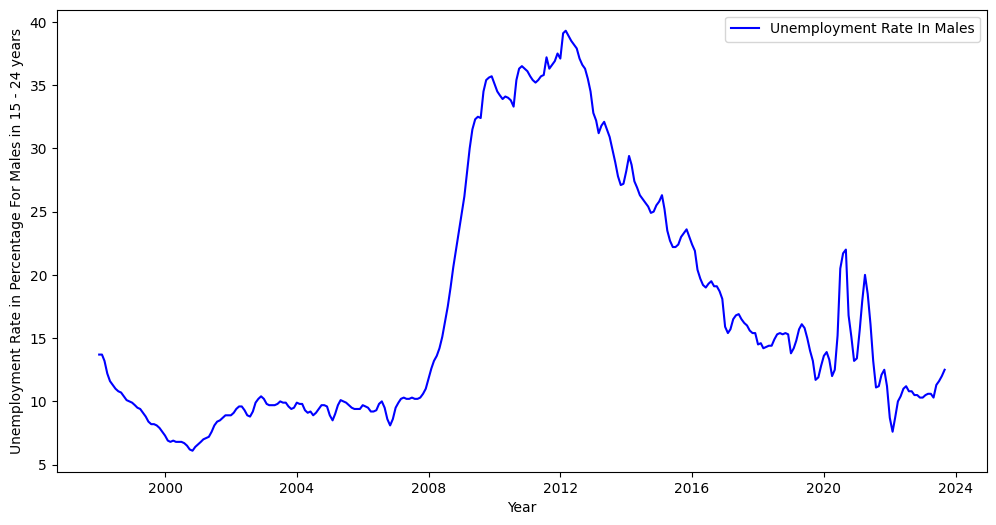

In [7]:
filterBySexAndAge=monthlyUnemploymentDF[(monthlyUnemploymentDF['Age Group']=='15 - 24 years') &  (monthlyUnemploymentDF['Sex']=='Male')] 
groupedByMonth=filterBySexAndAge.groupby('Month')['VALUE In Percentage'].mean()

plt.figure(figsize=(12,6))
plt.plot(groupedByMonth.index,groupedByMonth.values,label="Unemployment Rate In Males", color='blue')

#plt.scatter(groupedByMonth.index,groupedByMonth.values, color='red',marker='o',s=10, label='points')

plt.xlabel("Year")
plt.ylabel('Unemployment Rate in Percentage For Males in 15 - 24 years')
plt.legend()
plt.show()


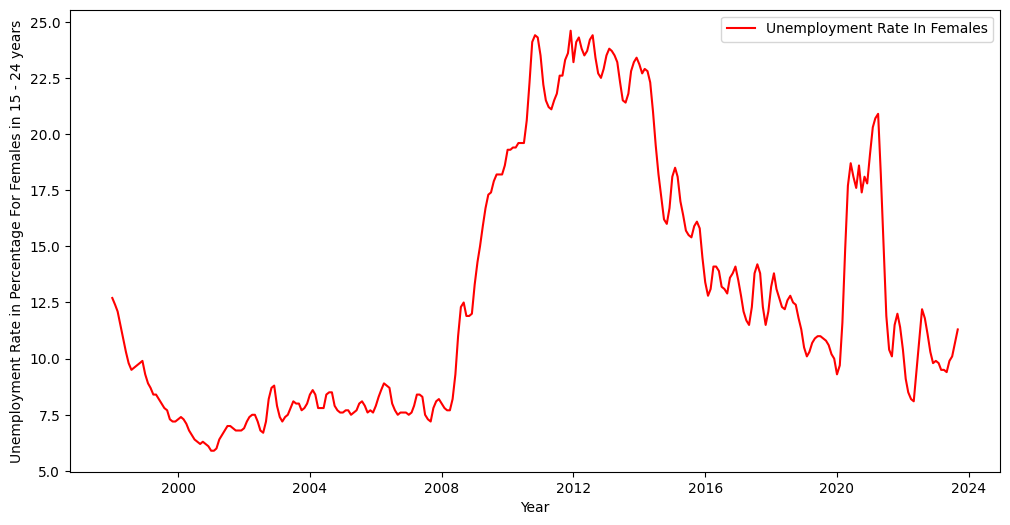

In [6]:
filterBySexAndAge=monthlyUnemploymentDF[(monthlyUnemploymentDF['Age Group']=='15 - 24 years') &  (monthlyUnemploymentDF['Sex']=='Female')] 
groupedByMonth=filterBySexAndAge.groupby('Month')['VALUE In Percentage'].mean()

plt.figure(figsize=(12,6))
plt.plot(groupedByMonth.index,groupedByMonth.values,label="Unemployment Rate In Females", color='red')

plt.xlabel("Year")
plt.ylabel('Unemployment Rate in Percentage For Females in 15 - 24 years')
plt.legend()
plt.show()

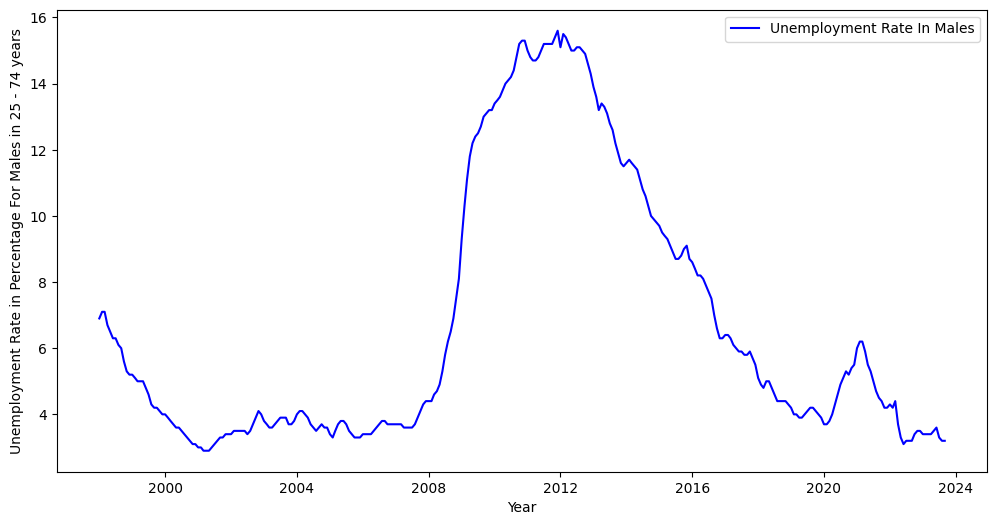

In [7]:
filterBySexAndAge=monthlyUnemploymentDF[(monthlyUnemploymentDF['Age Group']=='25 - 74 years') &  (monthlyUnemploymentDF['Sex']=='Male')] 
groupedByMonth=filterBySexAndAge.groupby('Month')['VALUE In Percentage'].mean()

plt.figure(figsize=(12,6))
plt.plot(groupedByMonth.index,groupedByMonth.values,label="Unemployment Rate In Males", color='blue')

plt.xlabel("Year")
plt.ylabel('Unemployment Rate in Percentage For Males in 25 - 74 years')
plt.legend()
plt.show()


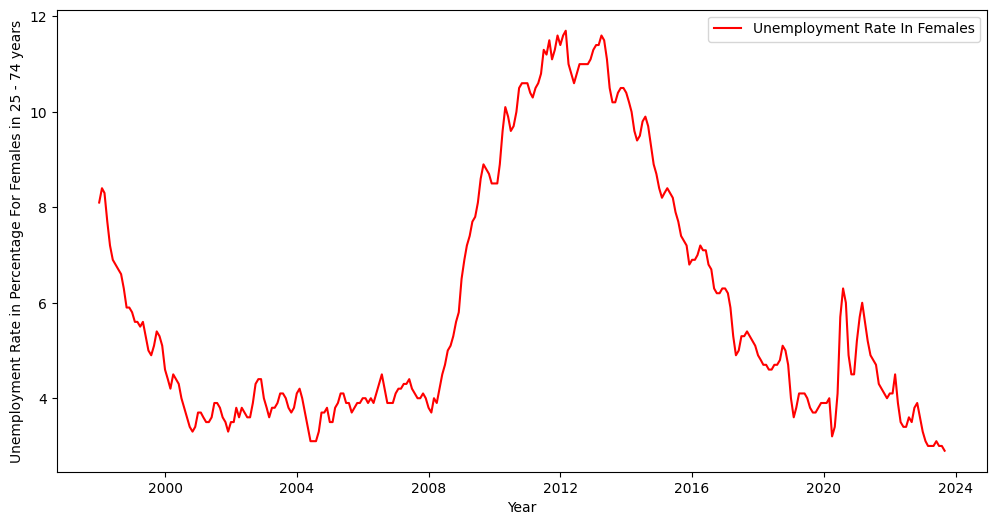

In [8]:
filterBySexAndAge=monthlyUnemploymentDF[(monthlyUnemploymentDF['Age Group']=='25 - 74 years') &  (monthlyUnemploymentDF['Sex']=='Female')] 
groupedByMonth=filterBySexAndAge.groupby('Month')['VALUE In Percentage'].mean()

plt.figure(figsize=(12,6))
plt.plot(groupedByMonth.index,groupedByMonth.values,label="Unemployment Rate In Females", color='red')

plt.xlabel("Year")
plt.ylabel('Unemployment Rate in Percentage For Females in 25 - 74 years')
plt.legend()
plt.show()

#### Now I am displaying unemployment graphs for each month. This way we can examine our data month by month. By using bar charts we can clearly compare two age groups in a given Month. And the different colors of each age group ake it easy to differenciate between them.

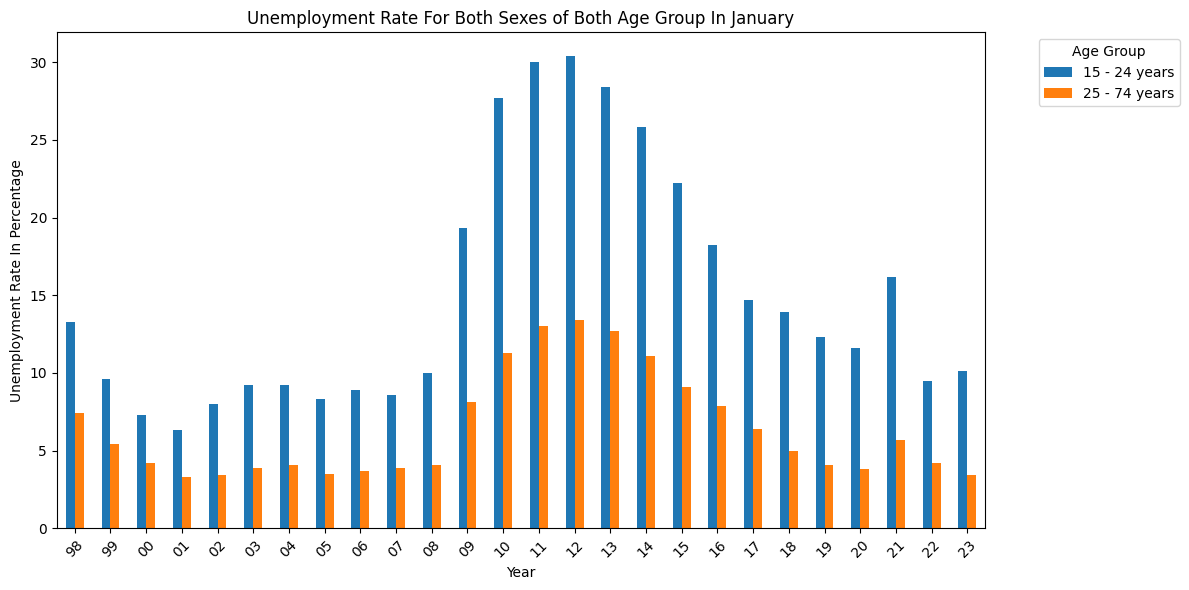

In [11]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

JanuaryDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 1)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=JanuaryDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In January')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


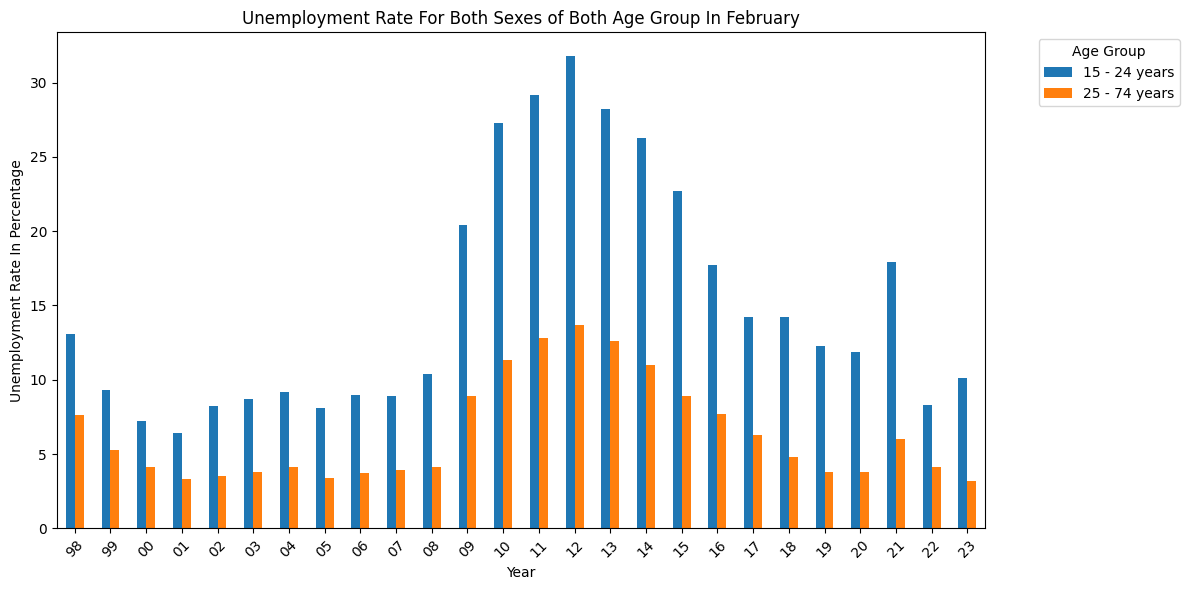

In [9]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

FebDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 2)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=FebDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In February')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


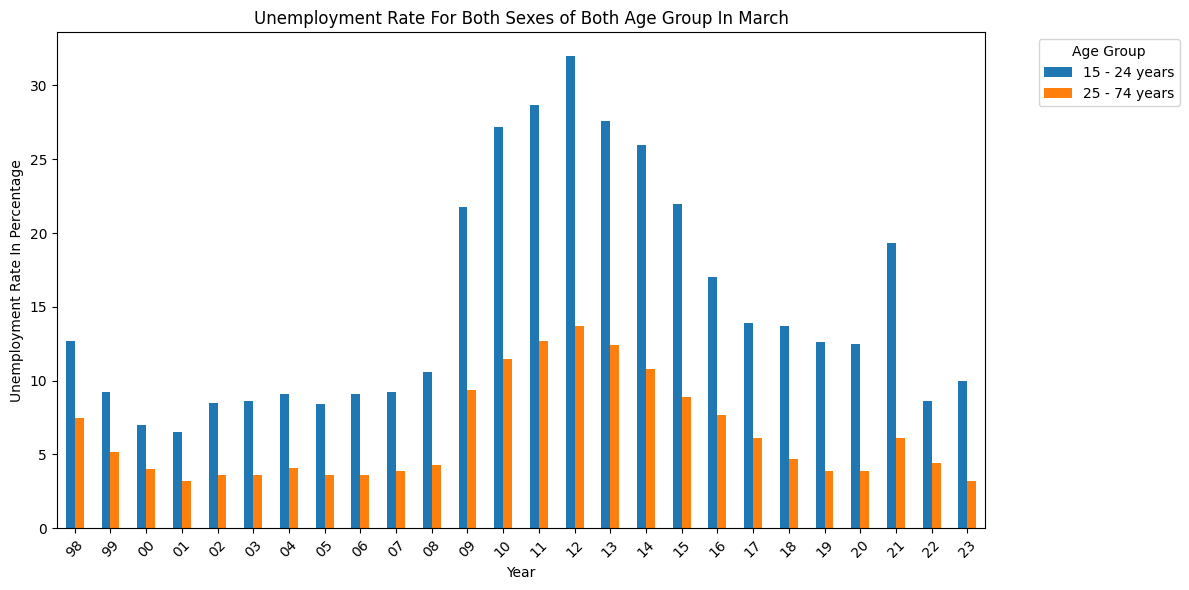

In [15]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

MarDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 3)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=MarDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In March')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


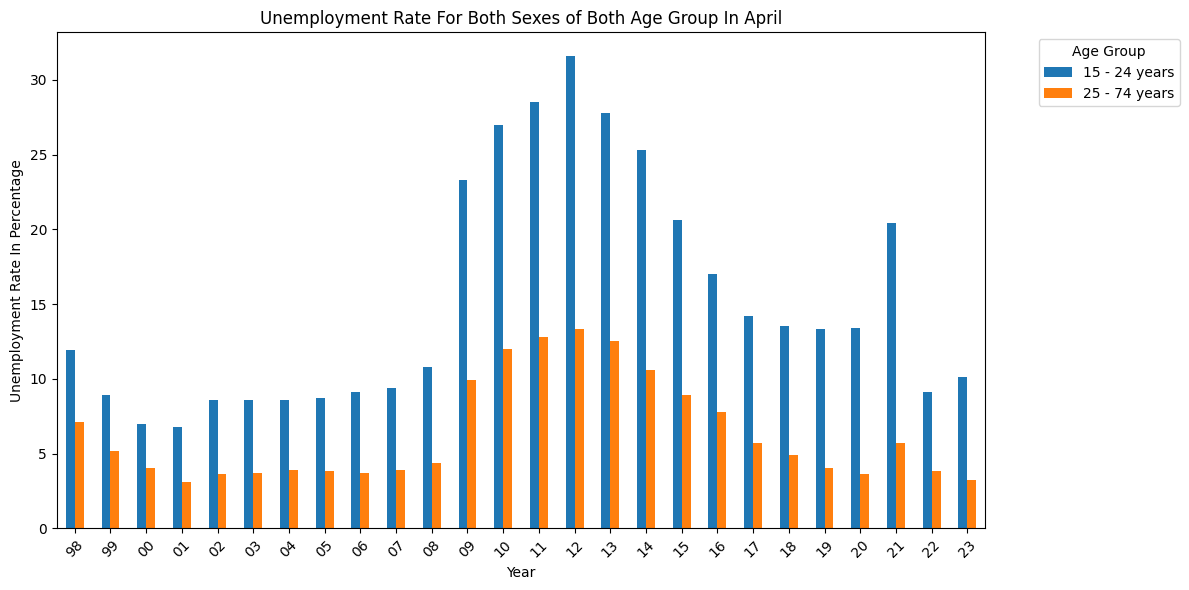

In [17]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

AprDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 4)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=AprDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In April')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


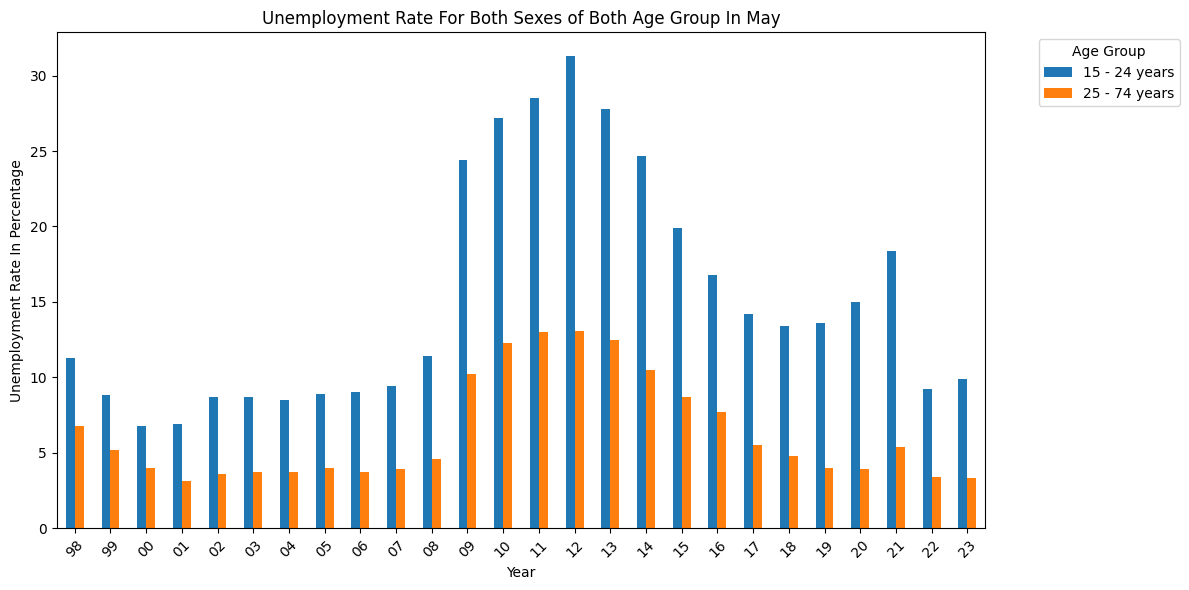

In [18]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

MayDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 5)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=MayDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In May')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


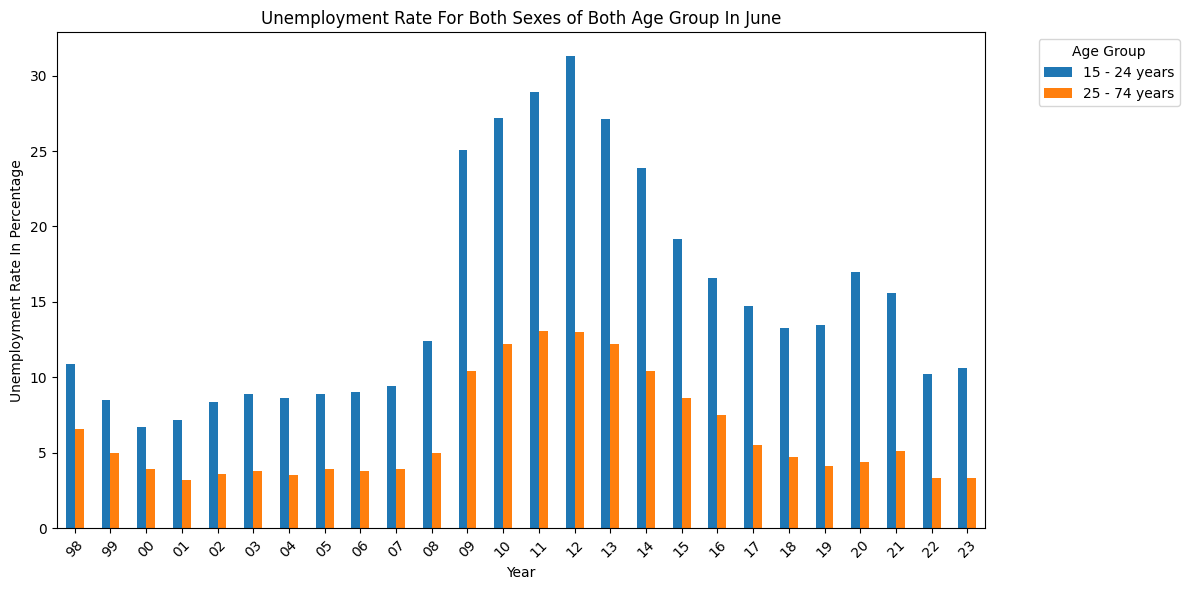

In [19]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

JuneDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 6)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=JuneDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In June')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


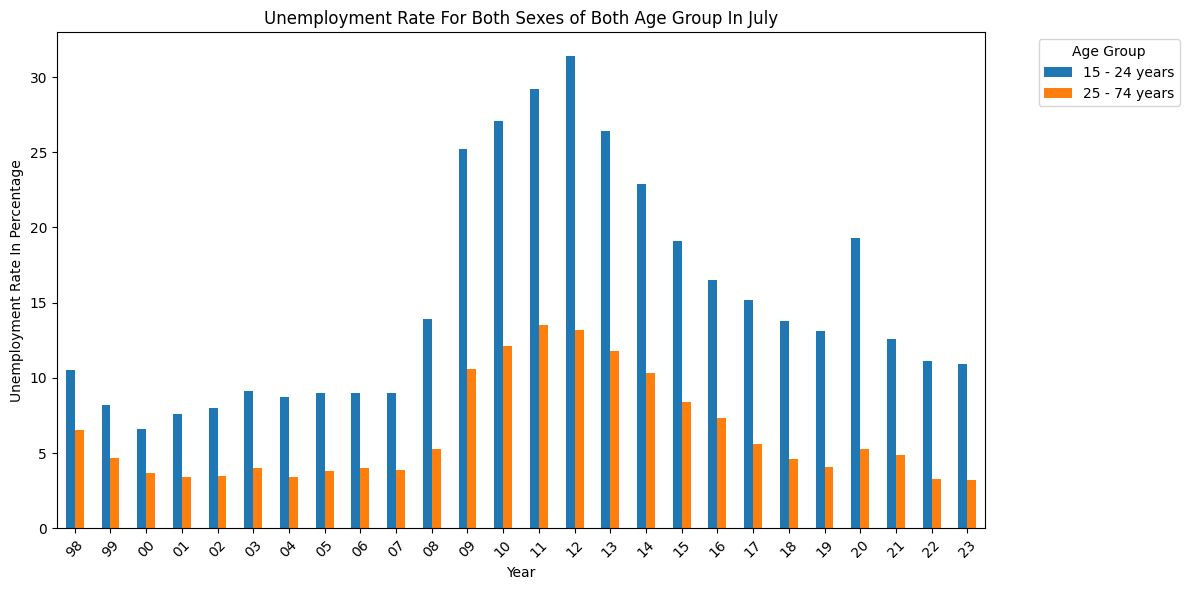

In [21]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

JulyDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 7)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=JulyDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In July')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


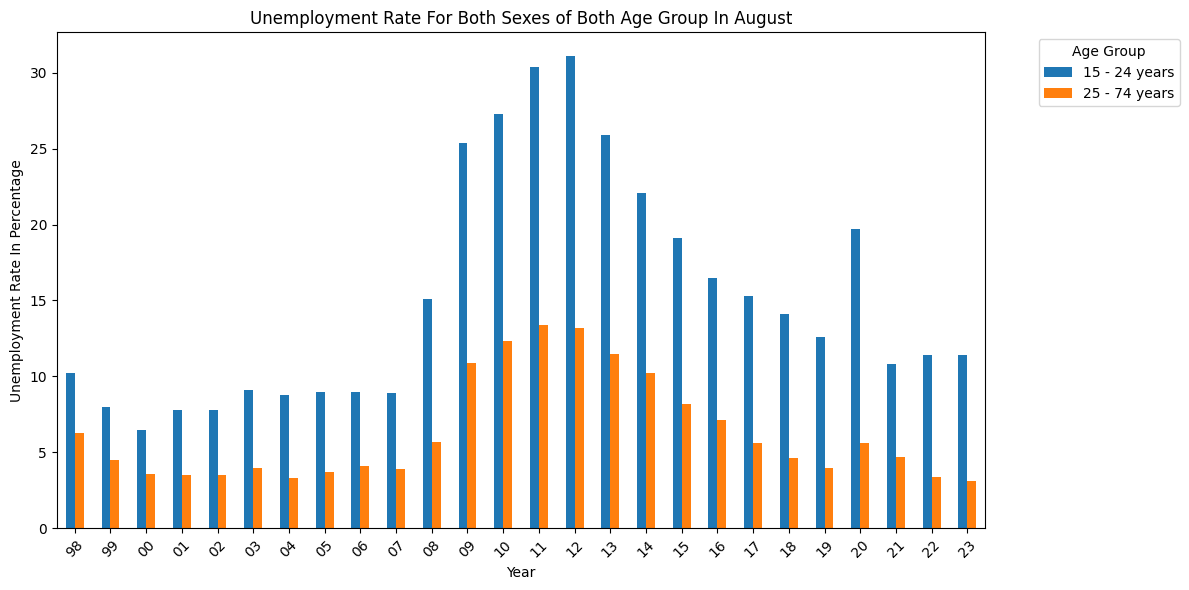

In [22]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.
AugDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 8)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=AugDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In August')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


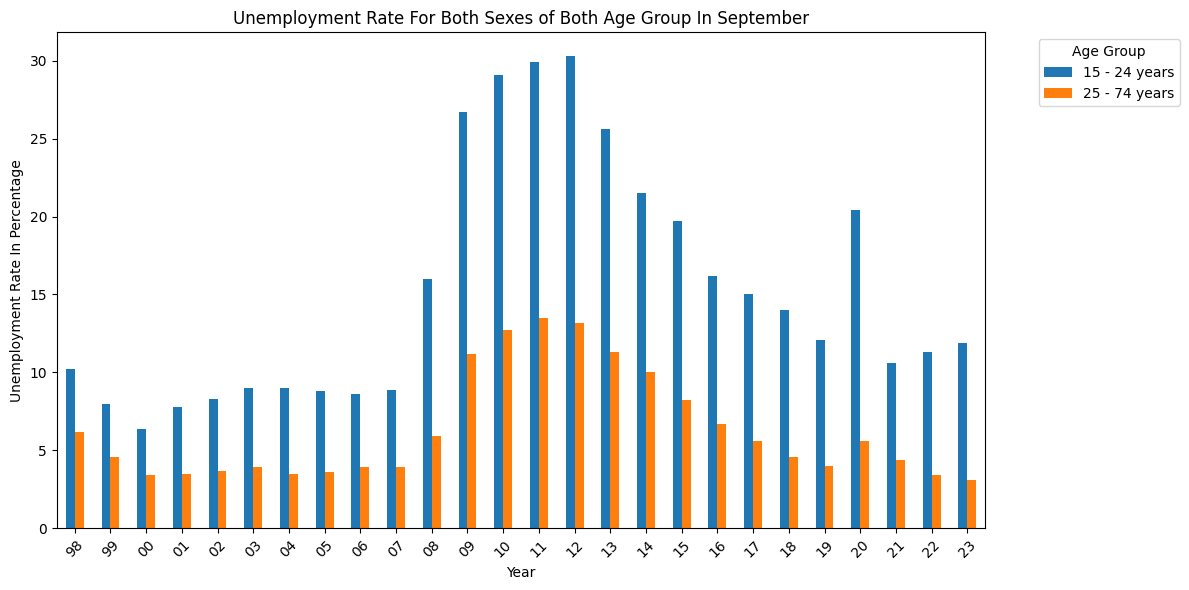

In [24]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

SepDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 9)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=SepDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In September')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


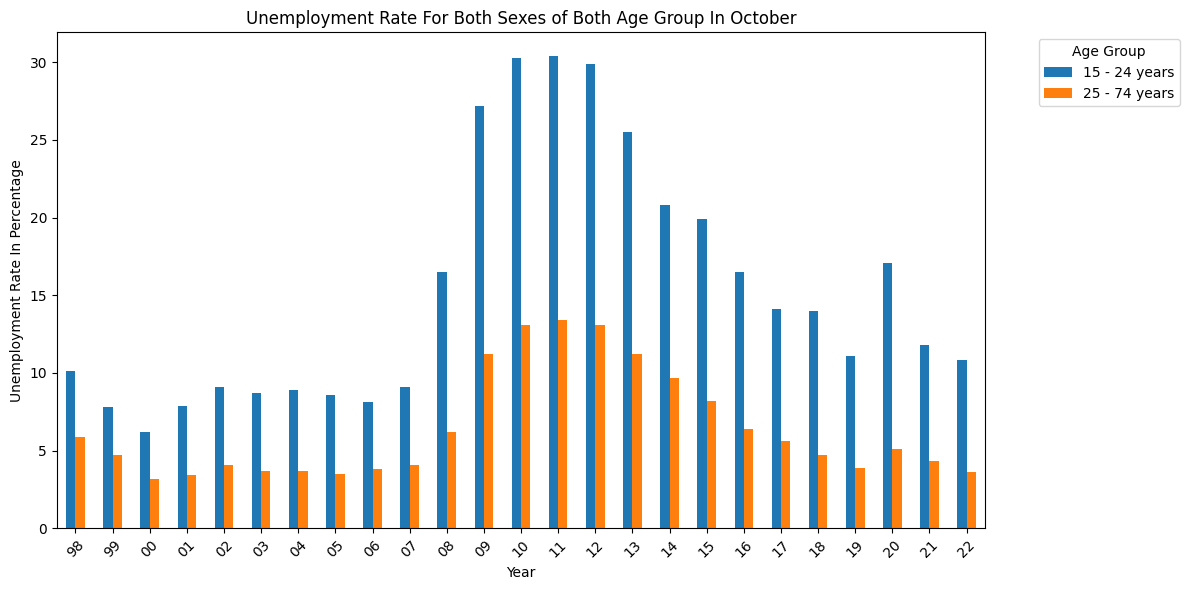

In [26]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

OctDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 10)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=OctDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In October')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


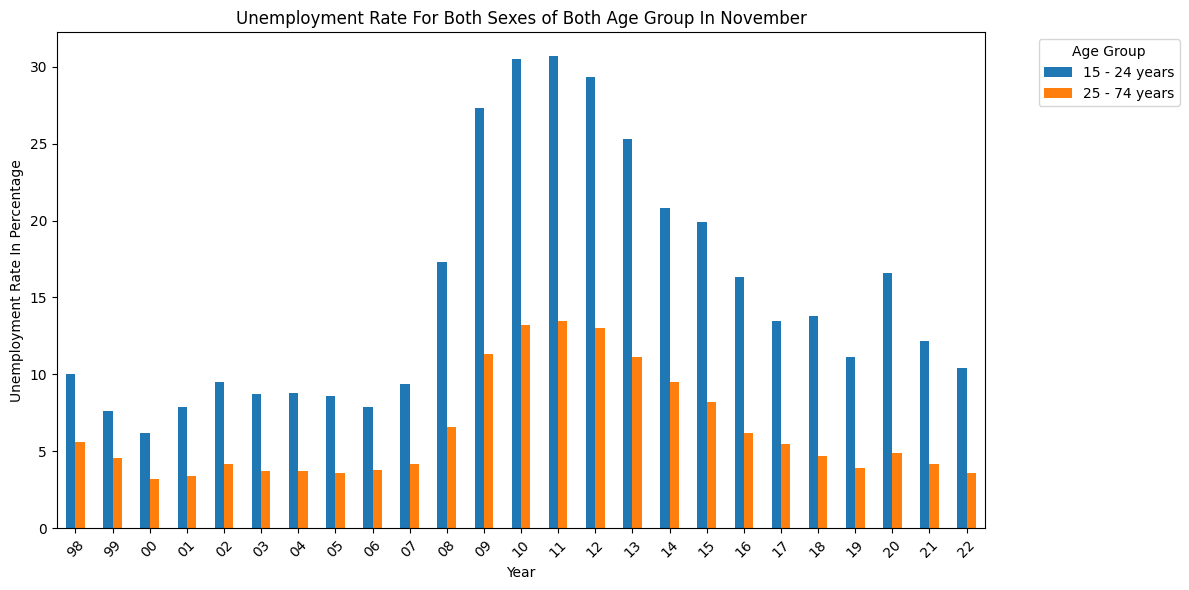

In [27]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

NovDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 11)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=NovDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In November')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()


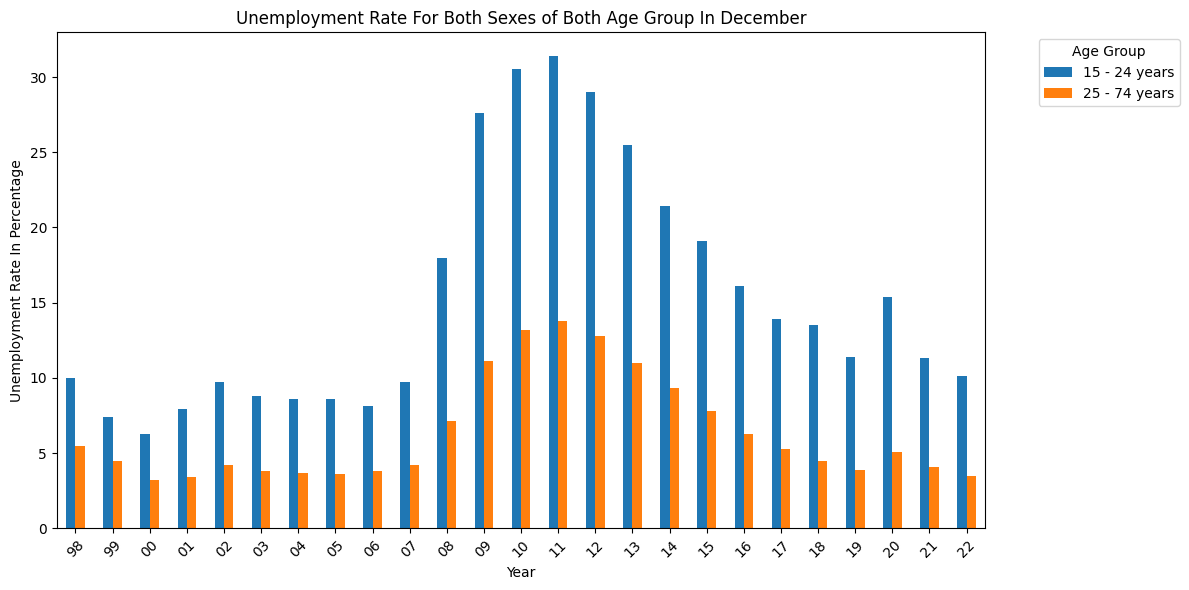

In [28]:
# Now lets make another graph to visualize out data. we can check the unemployment rate of each month to understrand it better.

DecDF=monthlyUnemploymentDF[
    (monthlyUnemploymentDF['Month'].dt.month == 12)  &
    (monthlyUnemploymentDF['Age Group'].isin(['15 - 24 years','25 - 74 years']))&
    (monthlyUnemploymentDF['Sex']=='Both sexes') ]

multiIndeDF=DecDF.pivot(index='Month',columns='Age Group', values='VALUE In Percentage')
fig,axix = plt.subplots(figsize=(12,6))
colors=['#1f77b4','#ff7f0e']
multiIndeDF.plot(kind='bar',ax=axix,color=colors)
axix.set_xlabel('Year')
axix.set_ylabel('Unemployment Rate In Percentage')
axix.set_title('Unemployment Rate For Both Sexes of Both Age Group In December')
axix.set_xticklabels([d.strftime('%y') for d in multiIndeDF.index],rotation= 45)
axix.legend(title='Age Group',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

plt.show()
